<a href="https://colab.research.google.com/github/annie-lyu/word-embedding/blob/master/doc2vec_(with_pretrained_word_embeddings)_lowercase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import glob
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/3wFURVovtk8vCl4EyYZUMH1XenwZBUgI1tQh5BLpM8kXUToX0AKRM2g
Mounted at /content/drive


In [2]:
import gensim.models as g
import logging
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedLineDocument, TaggedDocument

In [3]:
##optimal hyperparameter setting found by Lau and Baldwin (2016) and confirmed by 
vector_size = 300
window_size = 15
min_count = 1
sampling_threshold = 1e-5
negative_size = 5
train_epoch = 100
dm = 0
worker_count = 1 

In [4]:
pretrained_emb = "/content/drive/My Drive/test/glove.6B.100d.txt"
saved_path = "/content/drive/My Drive/test/model_6k_cor.bin"
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [5]:
import re
def removePunctuation(text):
    punctuation = '\\\\!,;:?"\'.-=^/|+-'
    text = re.sub(r'[{}]+'.format(punctuation),'',text)
    text = text.replace("\n", "")
    return text

In [6]:
!pip install pyspellchecker
from spellchecker import SpellChecker
spell = SpellChecker()

     |████████████████████████████████| 1.9MB 5.5MB/s 


In [ ]:
[
 'goddamnit',
 'meadowdaaaaaaaaaaaaaaaleeeeee',
 'seeping',
 'waaaaariorss',
 'lolog',
 'vt',
 'tew',
 'churchgoer',
 'lefsen',
 'karmawhoring',
 'mckinnon',
 'toshing',
 'huehuehue',
 'meespeltt',
 'rebate',
 'ahem',
 'iud',
 'misdemeanor',
 'swansea',
 'duckish',
 'madagascar',
 'balder',
 'yus',
 'swag',
 'debatable',
 'ø',
 'courty',
 'hummel',
 'bow',
 'basket',
 'roy',
 'rectum',
 'jerks',
 'meteor',
 'skosh',
 'î',
 'arr',
 'goonies',
 'halftime',
 'woooooooooooooooooooooooooo',
 'ð',
  'da',
 'pop',
 'camp',
 'boom',
 'bam',
 'bop',
 'bout',
 'ba',
 'rotta',
 'kalam',
 'beep',
 'æ',
 'plotting', 'mccourt', 'catholic', 'overheads', 'crohn',
 'ratio',
 'conscripted',
 'baker',
 'japan',
 'murderer',
 'gg',
 'tbp',
 'pls',
 'geffen',
 'cries',
 'easton',
 '\x00',
 'goodies',
 'misdemeanour',
 'stroke',
 'conflicted',
 'lollo',
 'careful',
 'sknsh',
 'penis',
 'infuriated', 'preach', '\x00'
 'toshiba',  'spirit', 'toshiba', 'acorn']

In [95]:
import nltk
with open("/content/drive/My Drive/test/reddit_6k.txt",encoding='latin-1') as f:
    data = f.read().replace('"', "")
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = list(set(stopwords.words('english'))) +['whimpering','fabio','alps', 'initial', 'betters',  'casio', 'wild', 'power', 'haden', 'debatable', 'hummel', 'he/she', 'scooby', 'roflmao',
                                                     'fees', 'carbonated', 'da', 'scrolls', 'swansea', 'acceptance', 'sieze', 'career', 'end', 'hug', 'permit','matters', 'iud','cann']

text = data.split("\n")
removed = []
for corpus in text:
  corpus = removePunctuation(corpus)
  words = corpus.split(" ") 
  words = [word for word in words if "ù" not in word]
  words = [word for word in words if "ï" not in word]
  words = [word for word in words if "â" not in word]
  words = [word for word in words if "ñ" not in word]
  words = [word for word in words if "æ" not in word]
  words = [word for word in words if "ã" not in word]
  words = [word for word in words if "ð" not in word]
  words = [word for word in words if "ÿ" not in word]
  words = [spell.correction(word) for word in words]
  word = [word for word in words if word not in stop_words]
  removed += [word]

new_corpus = [" ".join(words) for words in removed]
new_data = " \n".join(new_corpus)


with open('/content/drive/My Drive/test/reddit_6k_utf8_rmstop.txt','w',encoding='utf8') as f:
    f.write(new_data)

docs = g.doc2vec.TaggedLineDocument('/content/drive/My Drive/test/reddit_6k_utf8_rmstop.txt')




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [96]:

model_6k_cor = g.Doc2Vec(docs, size=vector_size, window=window_size, min_count=min_count, sample=sampling_threshold, workers=worker_count, hs=0, dm=dm, negative=negative_size, dbow_words=1, dm_concat=1, pretrained_emb=pretrained_emb, iter=train_epoch)

#save model
model_6k_cor.save(saved_path)


/usr/local/lib/python3.6/dist-packages/gensim/models/doc2vec.py:566: UserWarning: The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.
  warnings.warn("The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.")
/usr/local/lib/python3.6/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
2020-09-10 16:14:59,504 : INFO : collecting all words and their counts
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
2020-09-10 16:14:59,507 : I

In [97]:
    outp1 = "reddit_6k_cor_wv"
    outp2 = "reddit_6k_cor_pv"
    outp3 = "reddit_6k_cor_output"
    model_6k_cor.wv.save_word2vec_format(outp3) 

2020-09-10 16:15:49,908 : INFO : storing 9579x300 projection weights into reddit_6k_cor_output
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
#model = g.doc2vec.Doc2Vec.load("/content/drive/My Drive/test/model.bin")

In [98]:
#normalise vectors
import numpy as np
sum_of_rows = model_6k_cor.wv.syn0.sum(axis=1)
normalized = model_6k_cor.wv.syn0 / sum_of_rows[:, np.newaxis]
#normalized = np.delete(normalized,[829, 10172], 0)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  after removing the cwd from sys.path.


In [93]:
##clustering with pyclustering
!pip3 install pyclustering
from pyclustering.cluster.kmeans import kmeans, kmeans_visualizer
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.samples.definitions import FCPS_SAMPLES
from pyclustering.utils import read_sample
from pyclustering.utils.metric import distance_metric, type_metric


# Prepare initial centers using K-Means++ method.
initial_centers = kmeans_plusplus_initializer(normalized, 25).initialize()
 
# Create instance of K-Means algorithm with prepared centers.
kmeans_instance = kmeans(normalized, initial_centers)

# Run cluster analysis and obtain results.
kmeans_instance.process()
clusters = kmeans_instance.get_clusters()
final_centers = kmeans_instance.get_centers()

# Visualize obtained results
#cluster_visualizer.show_clusters(model.wv.syn0, clusters, final_centers)
[len(i) for i in clusters]

[2473,
 1,
 1,
 1,
 2025,
 1,
 1,
 1,
 1,
 1,
 63,
 31,
 10,
 3,
 1,
 3931,
 1,
 232,
 699,
 1,
 98,
 4,
 1,
 1,
 1]

In [ ]:
clusters[5]

[27, 187, 301, 370, 413, 848, 2357, 5353, 5354]

In [ ]:
model_6k_cor.wv.index2word[48]

'shit'

In [99]:
[model_6k_cor.wv.index2word[i] for cluster in clusters for i in cluster if len(cluster) == 1]

['fingerprinting',
 'minute',
 'fault',
 'underhuman',
 'transfer',
 'martyrdom',
 'owners',
 'mystere',
 'zqszj',
 'twenties',
 'del',
 'edison',
 'fame',
 'dated']

In [ ]:
[model_6k_cor.wv.index2word[i] for i in clusters[]]

['http', 'com', 'www', 'watch', 'nl', 'impure', 'v', 'couture']

In [ ]:

model_6k_rm.wv.index2word[829]
model_6k_rm.wv.index2word[10172]

'foraging'

In [ ]:
import numpy
import numpy as np
import gensim
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from gensim.models import Doc2Vec


pca = PCA(n_components=2).fit(normalized)
datapoint = pca.transform(normalized)
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure
label1 = ["gray", "orange", "deepskyblue", "crimson", "cornflowerblue", 
          "mediumseagreen", "gold"]

col = [0]* len(normalized)
for i in range(len(clusters)-1):
  cl = clusters[i]
  for j in cl:
    col[j] = i

color = [label1[i] for i in col]

plt.scatter(datapoint[:, 0], datapoint[:, 1],  c=color)
centroids = final_centers
centroidpoint = pca.transform(centroids)
plt.scatter(centroidpoint[:, 0], centroidpoint[:, 1], marker="^", s=150, c="#000000")
plt.show()


IndexError: ignored

In [ ]:
FCPS_SAMPLES.SAMPLE_TWO_DIAMONDS

For n_clusters = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 19, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 9, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 9, 0, 0, 0, 9, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 9, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 9, 0, 0, 0, 0, 9, 0, 22, 9, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 9, 0, 0, 9, 9, 0, 9, 0, 0, 0, 9, 0, 0, 9, 0, 9, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 17, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 9, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 22, 0, 0, 9, 0, 9, 0, 0, 0, 9, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 9, 0, 0, 0, 9, 9, 0, 0, 9, 0, 0, 0, 9, 0, 0, 0, 9, 0, 0, 0, 9, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 9, 0, 0, 0, 17, 9, 0, 0, 0, 0, 9, 9, 0, 9, 0, 9, 0, 0, 0, 0, 0, 0, 0, 17, 0, 0, 0, 0, 0, 9, 9, 0, 0, 0, 0, 9, 0, 0, 9, 0, 9, 0, 0, 9, 0, 9, 0, 0

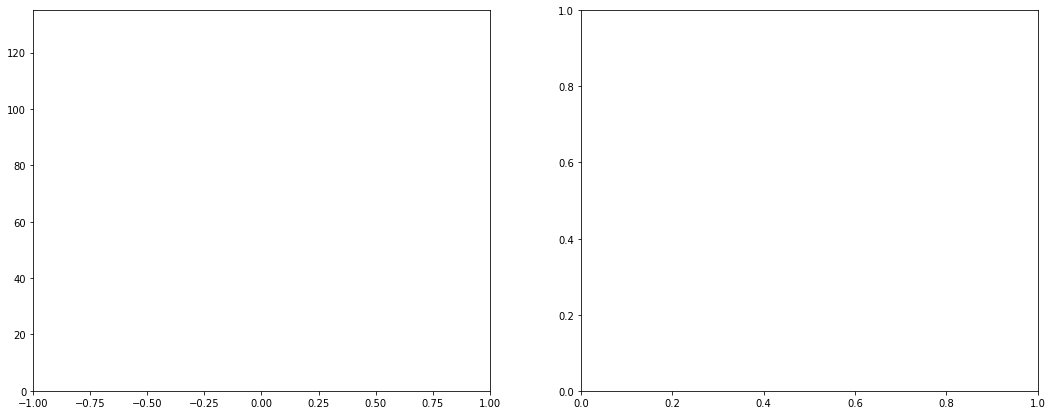

In [ ]:
#evaluation with silhouette
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
ax1.set_xlim([-1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(clusters) + (10 + 1) * 10])

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(normalized, metric = "euclidean", labels = col)
print("For n_clusters =", col,
          "The average silhouette_score is :", silhouette_avg)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(normalized, metric = "euclidean", labels =col)


Cluster sizes:  [1683 2740   50  331   10   70    8  953 3728    6]


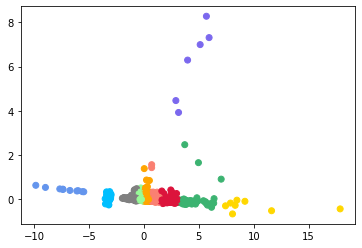

<Figure size 432x288 with 0 Axes>

In [114]:
##clustering with sklearn package
import numpy
import numpy as np
import gensim
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from gensim.models import Doc2Vec

kmeans_model10 = KMeans(n_clusters=10, init='k-means++', max_iter=100) 
X10 = kmeans_model10.fit(normalized)
label10=kmeans_model10.labels_.tolist()
l10 = kmeans_model10.fit_predict(normalized)
pca = PCA(n_components=2).fit(normalized)
datapoint = pca.transform(normalized)

counts10 = np.bincount(label10)
print("Cluster sizes: ",counts10)
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure
label1 = ["gray", "orange", "deepskyblue", "crimson", "cornflowerblue", 
          "mediumseagreen", "gold", "salmon", "palegreen", "mediumslateblue"]
color10 = [label1[i] for i in label10]
plt.scatter(datapoint[:, 0], datapoint[:, 1], c=color10)
centroids10 = kmeans_model10.cluster_centers_
centroidpoint10 = pca.transform(centroids10)
#plt.scatter(centroidpoint[:, 0], centroidpoint[:, 1], marker="^", s=150, c="#000000")
plt.show()
plt.savefig('/content/drive/My Drive/test/reddit word cluster 10.png')

In [107]:
##clustering with ntkl packages
distance_mat10 = kmeans_model10.fit_transform(normalized)
type(distance_mat)

numpy.ndarray

In [109]:
for i in range(10):
  if counts10[i] > 10:
    ind = np.argsort(distance_mat10[:,i])[0:9]
    w = [model_6k_cor.wv.index2word[j] for j in ind]
    print("Top 10 words for cluster", i, ":", w)
    if counts10[i] * 0.1 > 20:
        ind20 = np.argsort(distance_mat10[:,i])[0:19]
        w20 = [model_6k_cor.wv.index2word[k] for k in ind20]
        print("Top 20 words for cluster", i, ":", w20)
        if counts10[i] *0.1 > 25:
            ind25 = np.argsort(distance_mat10[:,i])[0:24]
            w25 = [model_6k_cor.wv.index2word[l] for l in ind25]
            print("Top 25 words for cluster", i, ":", w25)
  else:
    w0 = [model_6k_cor.wv.index2word[m] for m in range(len(label10)) if label10[m] ==i]
    print("words in cluster", i, ":", w0)

Top 10 words for cluster 0 : ['apps', 'karma', 'commenting', 'holders', 'ì\x81à', 'articulate', 'bothersome', 'truthful', 'refreshing']
Top 10 words for cluster 1 : ['apologies', 'shadowplay', 'leaning', 'tusk', 'indiana', 'outlet', 'pity', 'escorts', 'ucs']
Top 20 words for cluster 1 : ['apologies', 'shadowplay', 'leaning', 'tusk', 'indiana', 'outlet', 'pity', 'escorts', 'ucs', 'celebrate', 'browse', 'underprivileged', 'underage', 'shown', 'rtv', 'progress', 'launches', 'refuse', 'passenger']
Top 25 words for cluster 1 : ['apologies', 'shadowplay', 'leaning', 'tusk', 'indiana', 'outlet', 'pity', 'escorts', 'ucs', 'celebrate', 'browse', 'underprivileged', 'underage', 'shown', 'rtv', 'progress', 'launches', 'refuse', 'passenger', 'falls', 'ud', 'hall', 'permission', 'goaded']
Top 10 words for cluster 2 : ['nit', 'dong', 'hangs', 'bulk', 'zimmer', 'legarrette', 'utilizing', 'eyed', 'innovation']
Top 20 words for cluster 2 : ['nit', 'dong', 'hangs', 'bulk', 'zimmer', 'legarrette', 'utiliz

In [110]:
kmeans_model5 = KMeans(n_clusters=5, init='k-means++', max_iter=100) 
X5 = kmeans_model5.fit(normalized)
labels5=kmeans_model5.labels_.tolist()
l5 = kmeans_model5.fit_predict(normalized)
pca = PCA(n_components=2).fit(normalized)
datapoint = pca.transform(normalized)

counts5 = np.bincount(labels5)
print("Cluster sizes: ",counts5)


Cluster sizes:  [4665   75  745   60 4034]


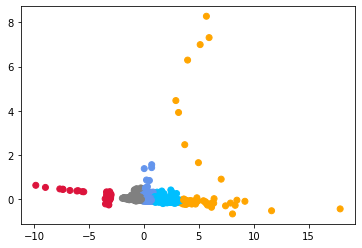

<Figure size 432x288 with 0 Axes>

In [115]:
%matplotlib inline
plt.figure
label1 = ["gray", "orange", "deepskyblue", "crimson", "cornflowerblue", 
          "mediumseagreen", "gold", "salmon", "palegreen", "mediumslateblue"]
color5 = [label1[i] for i in labels5]
plt.scatter(datapoint[:, 0], datapoint[:, 1], c=color5)
centroids5 = kmeans_model5.cluster_centers_
centroidpoint5 = pca.transform(centroids5)
#plt.scatter(centroidpoint[:, 0], centroidpoint[:, 1], marker="^", s=150, c="#000000")
plt.show()
plt.savefig('/content/drive/My Drive/test/reddit word cluster 5.png')

In [113]:
distance_mat5 = kmeans_model5.fit_transform(normalized)

for i in range(5):
  if counts5[i] > 10:
    ind = np.argsort(distance_mat5[:,i])[0:9]
    w = [model_6k_cor.wv.index2word[j] for j in ind]
    print("Top 10 words for cluster", i, ":", w)
    if counts5[i] * 0.1 > 20:
        ind20 = np.argsort(distance_mat5[:,i])[0:19]
        w20 = [model_6k_cor.wv.index2word[k] for k in ind20]
        print("Top 20 words for cluster", i, ":", w20)
        if counts5[i] *0.1 > 25:
            ind25 = np.argsort(distance_mat5[:,i])[0:24]
            w25 = [model_6k_cor.wv.index2word[l] for l in ind25]
            print("Top 25 words for cluster", i, ":", w25)
  else:
    w0 = [model_6k_cor.wv.index2word[m] for m in range(len(labels5)) if labels5[m] ==i]
    print("words in cluster", i, ":", w0)

Top 10 words for cluster 0 : ['scriptkiddies', 'bosa', 'freaky', 'bean', 'bchzfwdcnya', 'fame', 'taxpayer', 'ethnic', 'demographics']
Top 20 words for cluster 0 : ['scriptkiddies', 'bosa', 'freaky', 'bean', 'bchzfwdcnya', 'fame', 'taxpayer', 'ethnic', 'demographics', 'bailey', 'emulators', 'neutral', 'quotable', 'admits', 'shittyhdr', 'discs', 'laser', 'erased', 'calculators']
Top 25 words for cluster 0 : ['scriptkiddies', 'bosa', 'freaky', 'bean', 'bchzfwdcnya', 'fame', 'taxpayer', 'ethnic', 'demographics', 'bailey', 'emulators', 'neutral', 'quotable', 'admits', 'shittyhdr', 'discs', 'laser', 'erased', 'calculators', 'category', 'wasted', 'souls', 'casts', 'bushed']
Top 10 words for cluster 1 : ['adamant', 'uncomfortably', 'jeez', 'flake', 'footsteps', 'colts', 'groaned', 'escaped', 'hater']
Top 10 words for cluster 2 : ['overpriced', 'graph', 'foreshore', 'earthquake', 'veggies', 'quakes', 'whatnot', 'calories', 'slight']
Top 20 words for cluster 2 : ['overpriced', 'graph', 'foreshor